In [0]:
import cv2 
from random import shuffle 
from tqdm import tqdm 
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
import zipfile
zip_ref = zipfile.ZipFile("/content/train.zip", 'r')
zip_ref.extractall("/tmp")

In [0]:
filenames=os.listdir('/tmp/train')
categories=[]
for filename in filenames:
  category= filename.split('.')[0]
  if category == 'dog':
    categories.append('dog')
  else:
    categories.append('cat')

train_data= pd.DataFrame({'Filename':filenames,'Category':categories})
  
train_data.head()

,Filename,Category
0,cat.5721.jpg,cat
1,cat.12084.jpg,cat
2,dog.11124.jpg,dog
3,dog.5092.jpg,dog
4,cat.7605.jpg,cat


In [0]:
train_df, validate_df = train_test_split(train_data, test_size= 0.2, random_state =36)
train_df= train_df.reset_index(drop=True)
validate_df= validate_df.reset_index(drop=True)

In [0]:
batch_size = 256
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [0]:
train_data_gen = train_image_generator.flow_from_dataframe(train_df,
                                                           batch_size=batch_size,
                                                           directory='/tmp/train',
                                                           x_col='Filename',
                                                           y_col='Category',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary'
                                                           )

Found 20000 validated image filenames belonging to 2 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_dataframe(validate_df,
                                                           batch_size=batch_size,
                                                           directory='/tmp/train',
                                                           x_col='Filename',
                                                           y_col='Category',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary'
                                                          )

Found 5000 validated image filenames belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

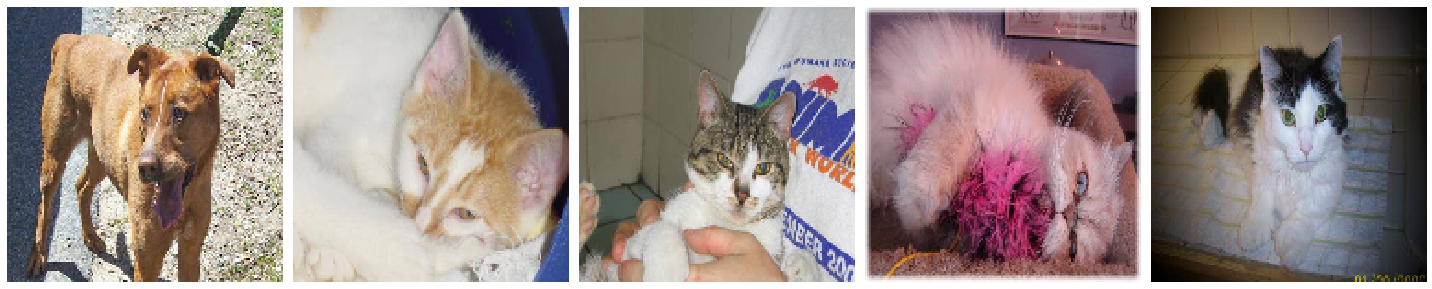

In [0]:
plotImages(sample_training_images[:5])

In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [0]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [0]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=len(train_df) // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=len(validate_df) // batch_size
)

Epoch 1/15
156/156 [==============================] - 608s 4s/step - loss: 0.8053 - acc: 0.5866 - val_loss: 0.6211 - val_acc: 0.6510
Epoch 2/15
156/156 [==============================] - 615s 4s/step - loss: 0.5540 - acc: 0.7153 - val_loss: 0.5961 - val_acc: 0.6777
Epoch 3/15
156/156 [==============================] - 597s 4s/step - loss: 0.5071 - acc: 0.7503 - val_loss: 0.5385 - val_acc: 0.7248
Epoch 4/15
156/156 [==============================] - 608s 4s/step - loss: 0.4667 - acc: 0.7820 - val_loss: 0.5180 - val_acc: 0.7352
Epoch 5/15
156/156 [==============================] - 614s 4s/step - loss: 0.4246 - acc: 0.8046 - val_loss: 0.5416 - val_acc: 0.7298
Epoch 6/15
156/156 [==============================] - 604s 4s/step - loss: 0.3934 - acc: 0.8219 - val_loss: 0.4604 - val_acc: 0.7905
Epoch 7/15
156/156 [==============================] - 607s 4s/step - loss: 0.3551 - acc: 0.8409 - val_loss: 0.4100 - val_acc: 0.8135
Epoch 8/15
156/156 [==============================] - 620s 4s/step - 

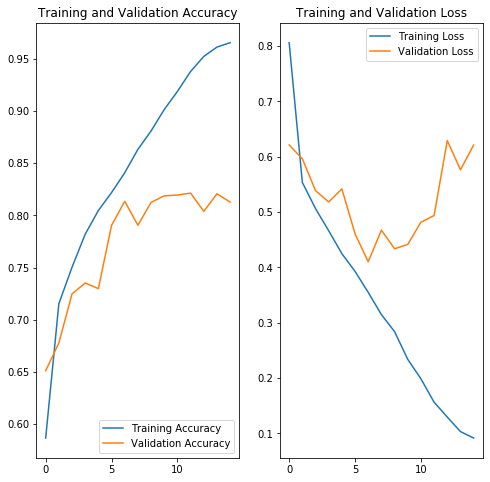

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./logs'),
           tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix,save_weights_only=True),
           earlystop,
           learning_rate_reduction]

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 18, 64)       

In [0]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=len(train_df) // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=len(validate_df) // batch_size,
    callbacks=callbacks
)

Epoch 1/10
78/78 [==============================] - 372s 5s/step - loss: 0.2519 - accuracy: 0.8947 - val_loss: 0.3329 - val_accuracy: 0.8520
Epoch 2/10
78/78 [==============================] - 365s 5s/step - loss: 0.2708 - accuracy: 0.8858 - val_loss: 0.3212 - val_accuracy: 0.8581
Epoch 3/10
78/78 [==============================] - 372s 5s/step - loss: 0.2420 - accuracy: 0.8983 - val_loss: 0.3238 - val_accuracy: 0.8499
Epoch 4/10
77/78 [============================>.] - ETA: 4s - loss: 0.2444 - accuracy: 0.8970
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
78/78 [==============================] - 369s 5s/step - loss: 0.2431 - accuracy: 0.8976 - val_loss: 0.3458 - val_accuracy: 0.8487
Epoch 5/10
78/78 [==============================] - 372s 5s/step - loss: 0.1933 - accuracy: 0.9178 - val_loss: 0.2970 - val_accuracy: 0.8680
Epoch 6/10
78/78 [==============================] - 371s 5s/step - loss: 0.1762 - accuracy: 0.9303 - val_loss: 0.3183 - val_accuracy

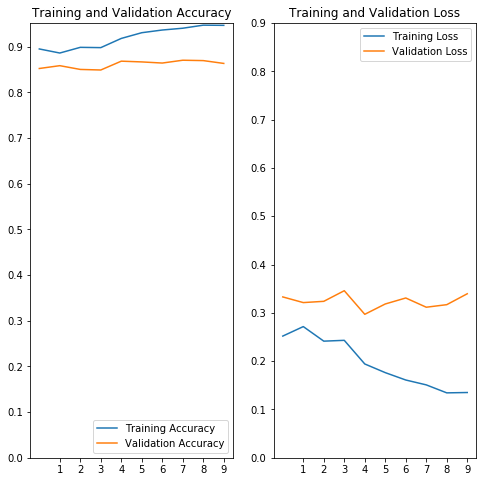

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xticks(np.arange(1, epochs, 1))
plt.yticks(np.arange(0, 1, 0.1))
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xticks(np.arange(1, epochs, 1))
plt.yticks(np.arange(0, 1, 0.1))
plt.title('Training and Validation Loss')
plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!ls /content/drive

'My Drive'


In [0]:
model.save("/content/drive/My Drive/model.h5")

In [0]:
re_model = tf.keras.models.load_model('/content/drive/My Drive/model.h5')
re_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 18, 64)       

In [0]:
!ls {checkpoint_dir}

checkpoint		     ckpt_5.data-00000-of-00001
ckpt_10.data-00000-of-00001  ckpt_5.index
ckpt_10.index		     ckpt_6.data-00000-of-00001
ckpt_1.data-00000-of-00001   ckpt_6.index
ckpt_1.index		     ckpt_7.data-00000-of-00001
ckpt_2.data-00000-of-00001   ckpt_7.index
ckpt_2.index		     ckpt_8.data-00000-of-00001
ckpt_3.data-00000-of-00001   ckpt_8.index
ckpt_3.index		     ckpt_9.data-00000-of-00001
ckpt_4.data-00000-of-00001   ckpt_9.index
ckpt_4.index
